In [7]:
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

Building a quantum circuit with three qubits and three classical bits and is visualized using draw function

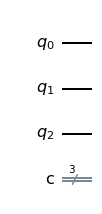

In [8]:
qc = QuantumCircuit(3, 3)
qc.draw('mpl')

Applying [Hadamard gate](https://freecontent.manning.com/all-about-hadamard-gates/) to create quantum superposition 

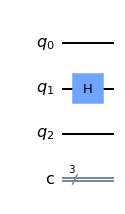

In [9]:
qc.h(1)
qc.draw('mpl')

Measuring the qubits using measure() function

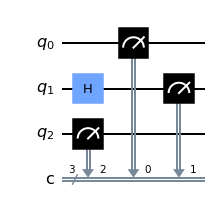

In [10]:
qc.measure(range(3), range(3))
qc.draw('mpl')

Using QASM simulator using qiskit.visualizations module

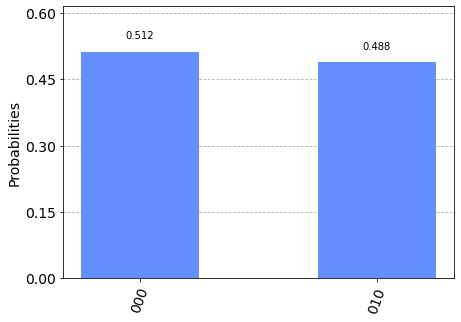

In [11]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots = 1000).result()
counts = result.get_counts()
plot_histogram(counts)

Below is a quantum circuit where the first qubit is the control qubit and the second qubit is the target qubit. Also applying [controlled NOT gate](https://www.nature.com/articles/nature05896)

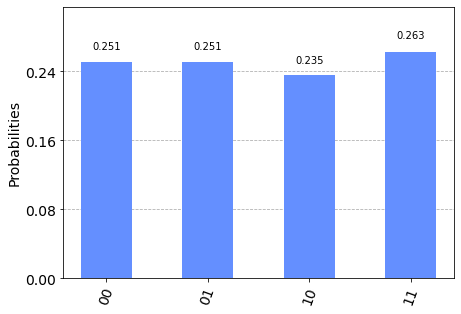

In [12]:
cx_demo = QuantumCircuit(2, 2)
cx_demo.h(range(2))
cx_demo.cx(0, 1)
cx_demo.measure(range(2), range(2))

counts_cx = execute(cx_demo, backend).result().get_counts()
plot_histogram(counts_cx)

Below is a 3-qubit quantum circuit where first two qubits are control qubits and third is target. Apply [Toffoli gate](https://en.wikipedia.org/wiki/Toffoli_gate) which is CCNOT gate. Truth table for the above two CCNOT gates are available in Qiskit documentation.

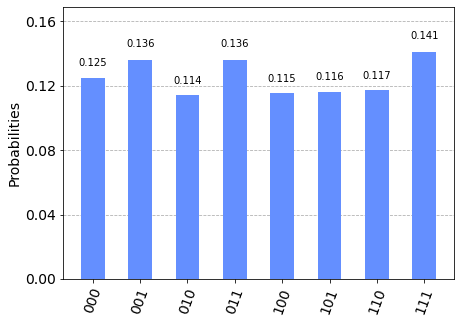

In [13]:
ccx_demo = QuantumCircuit(3, 3)
ccx_demo.h(range(3))
ccx_demo.ccx(0, 1, 2)
ccx_demo.measure(range(3), range(3))

counts_ccx = execute(ccx_demo, backend).result().get_counts()
plot_histogram(counts_ccx)

We can connect one quantum circuit to another using the append() function in Qiskit library. Below we are trying to append the above build CNOT circuit to the last two qubits of the CCNOT circuit

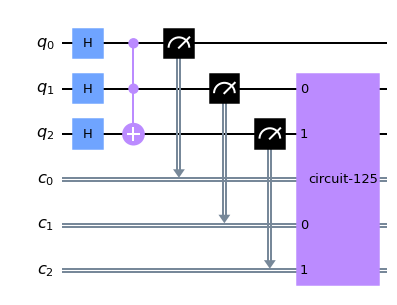

In [14]:
ccx_demo.append(cx_demo, [1, 2], [1, 2])
ccx_demo.draw('mpl', cregbundle = False)

Initialize registers:
single qubit registers:
a, b
cin ->  carry in
s -> store sum
cout -> carry out 

In [15]:
a    = QuantumRegister(1, 'a')
b    = QuantumRegister(1, 'b')
cin  = QuantumRegister(1, 'cin')
s    = QuantumRegister(1, 's')
cout = QuantumRegister(1, 'cout')
creg = ClassicalRegister(5, 'creg')

Syntax to add registers to a quantum circuit >> qc.add_register(reg)

In [16]:
full_adder = QuantumCircuit()
full_adder.add_register(a)
full_adder.add_register(b)
full_adder.add_register(cin)
full_adder.add_register(s)
full_adder.add_register(cout)
full_adder.add_register(creg)

In [17]:
full_adder.cx(a, s)
full_adder.cx(b, s)
full_adder.cx(cin, s)

In [18]:
full_adder.ccx(a, b, cout)
full_adder.ccx(b, cin, cout)
full_adder.ccx(a, cin, cout)

Now write a full adder function from above implementation

In [19]:
def full_adder():
    # Initialize quantum registers
    a = QuantumRegister(1, 'a')
    b = QuantumRegister(1, 'b')
    cin = QuantumRegister(1, 'cin')
    s = QuantumRegister(1, 's')
    cout = QuantumRegister(1, 'cout')
    creg = ClassicalRegister(5, 'creg')
    # Building quantum circuit
    qc = QuantumCircuit()
    qc.add_register(a)
    qc.add_register(b)
    qc.add_register(cin)
    qc.add_register(s)
    qc.add_register(cout)
    qc.add_register(creg)
    # Sum
    qc.cx(a, s)
    qc.cx(b, s)
    qc.cx(cin, s)
    # Cout
    qc.ccx(a, b, cout)
    qc.ccx(b, cin, cout)
    qc.ccx(a, cin, cout)
    # Return the circuit
    return qc

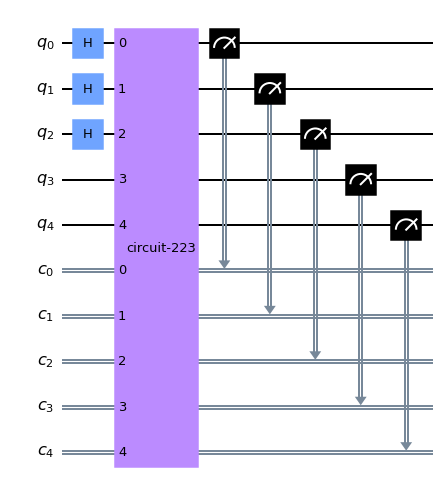

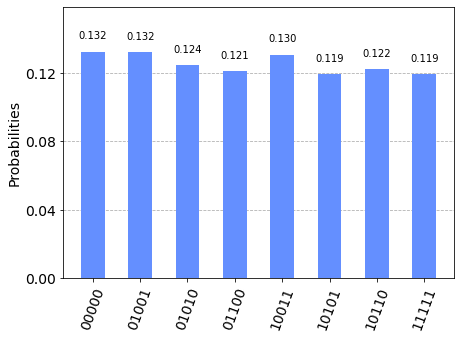

In [20]:
# Create the circuit
adder = QuantumCircuit(5, 5)
adder.h(range(3))
adder.append(full_adder(), range(5), range(5))
adder.measure(range(5), range(5))
display(adder.draw('mpl', cregbundle = False))

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
adder_counts = execute(adder, backend, shots = 4096).result().get_counts()
plot_histogram(adder_counts)